In [26]:
#!pip install sklearn
#!pip install category_encoders

  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1


distributed 1.21.8 requires msgpack, which is not installed.
mxnet 1.3.1 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.16.2 which is incompatible.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\5570\\AppData\\Local\\Temp\\pip-uninstall-4kg63wng\\users\\5570\\anaconda3\\lib\\site-packages\\sklearn\\cluster\\_dbscan_inner.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
#import the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
import math
import re
import datetime
from sklearn.cluster import KMeans
df = pd.read_csv("autos_new.csv")

In [2]:
# function to count the number of nan values present in each column
def nancount(x):
    count=0
    a=df[x].isnull()
    for val in a:
        if(val == True):
            count+=1
    return count
    
counts={}
for i in df.columns:
    returnval=nancount(i)
    if(returnval!=0):
        counts[i]=nancount(i)
print(counts)

{'vehicle_type': 41732, 'gearbox': 13585, 'model': 15332, 'fuel_type': 24034, 'unrepaired_damage': 55331}


max and min of Power is:  20000 0
No. of points in each bin :  [335003     31      6     19     10     16      7      5     10      4]


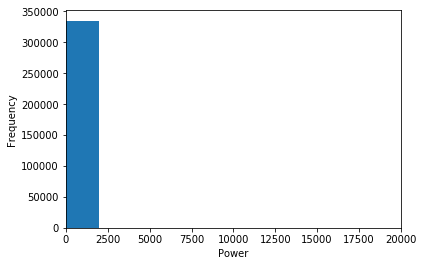

In [3]:
#histogram to find the range and spread of Power 
print("max and min of Power is: ",max(df.power_ps),min(df.power_ps))
hist, bin_edges = scipy.histogram(df.power_ps)
  
# Checking the results 
print ("No. of points in each bin : ", hist) 
  
# plotting the histogram 
plt.hist(df.power_ps) 
plt.xlim(min(bin_edges), max(bin_edges)) 
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.show() 


In [4]:
#remove the power valus out of range(0,1000)
df=df[(df.power_ps>0) & (df.power_ps<=1000)]

#fill in the suv vehicle type
for i,r in df.vehicle_type.iteritems():
    if (isinstance(r,float)):
        if(re.search('SUV',df.name[i],re.IGNORECASE)!=None):
            df.vehicle_type.loc[i]='suv'


C:\Users\5570\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
#rempve the rows whose vehical type and fuel type is unkown
df=df[(df.vehicle_type.isnull()==False) & (df.fuel_type.isnull()==False) & (df.model.isnull()==False)] 

In [6]:
#remove the rows with more than 2 NaN values
for row in df.iterrows():
    count=0
    for col in row:
        if isinstance(col,float):
            count+=1
    if count>=2:
        df.drop(row,axis=0)

22.398755973721514 77.60124402627848


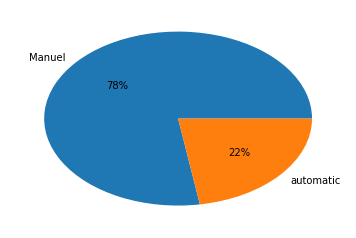

In [7]:
# pie chart to visualize the type of gearbox
valcount=df.gearbox.value_counts()
noperc=(valcount['automatik']/(valcount['automatik']+valcount['manuell']))*100
yesperc=(valcount['manuell']/(valcount['automatik']+valcount['manuell']))*100
print(noperc,yesperc)

plt.pie(valcount,labels=['Manuel','automatic'], autopct='%1.0f%%')
plt.show()

In [8]:
#replace the NaN values
for index,row in df.gearbox.iteritems():
    if(isinstance(row,float)):
        x=random.randint(1,100)
        if (x>=1 and x<=80):
            df.gearbox.loc[index]='manuell'
        else:
            df.gearbox.loc[index]='automatik'

C:\Users\5570\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
#percentage of unrepaired damage
valcount1=df.unrepaired_damage.value_counts()
noperc1=(valcount1['nein']/(valcount1['nein']+valcount1['ja']))*100
yesperc1=(valcount1['ja']/(valcount1['nein']+valcount1['ja']))*100
print(noperc1,yesperc1)


91.3353999513737 8.664600048626307


In [10]:
#replace the NaN values
for index,row in df.unrepaired_damage.iteritems():
    if(isinstance(row,float)):
        x=random.randint(1,100)
        if (x>=1 and x<=90):
            df.unrepaired_damage.loc[index]='nein'
        else:
            df.unrepaired_damage.loc[index]='ja'

C:\Users\5570\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


91.1769616999134 8.823038300086596


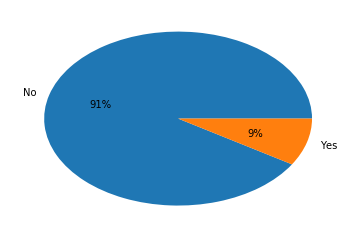

In [11]:
# visualization of distribution after replacement
valcount=df.unrepaired_damage.value_counts()
noperc=(valcount['nein']/(valcount['nein']+valcount['ja']))*100
yesperc=(valcount['ja']/(valcount['nein']+valcount['ja']))*100
print(noperc,yesperc)

plt.pie(valcount,labels=['No','Yes'], autopct='%1.0f%%')
plt.show()

In [2]:
def replace_model(name):
    name = name.replace("___", "-")
    name = name.split("_")
    try:   
        return name[1].lower()
    except:
        return name
names = df["name"]
models = names.apply(replace_model)

In [19]:
# check the number of NaN values
counts={}
for i in df.columns:
    returnval=nancount(i)
    if(returnval!=0):
        counts[i]=nancount(i)
print(counts)

{}


In [34]:
#calculating age of each car and removing negative age rows
ages=[]
for index,row in df.ad_created.iteritems():
    selly,sellm,selld=row.split('-')
    regy=int(df.registration_year[index])
    regm=int(df.registration_month[index])
    if(regm==0):
        df.registration_month.loc[index]=1
        regm=1
    agey=int(selly)-regy
    agem=int(sellm)-regm
    if(agey>0 and agem<0):
        agem=12-agem
    age=agey+(agem/12)
    ages.append(age)
    
df['Age']=ages
df=df[(df.Age>0)]

C:\Users\5570\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\5570\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


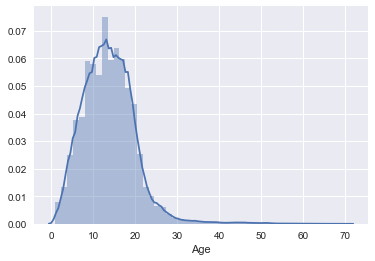

In [35]:
#plotting distribution of Age of cars
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(df.Age)
plt.show()

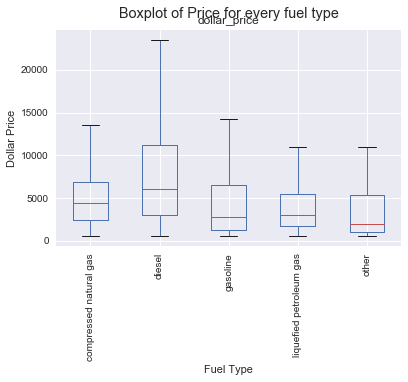

In [47]:
#boxplot of price for every fuel type (without outliers)
df.boxplot(by="fuel_type", column="dollar_price",showfliers=False)
plt.suptitle('Boxplot of Price for every fuel type')
plt.xticks(rotation=90)
plt.xlabel('Fuel Type')
plt.ylabel('Dollar Price')
plt.show()

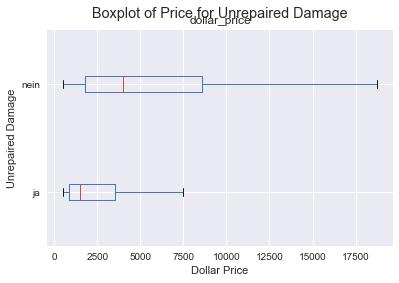

In [48]:
#boxplot of price for 'no' and 'yes' unrepaired damage (without outliers)
df.boxplot(by="unrepaired_damage", column="dollar_price",vert=False,showfliers=False)
plt.suptitle('Boxplot of Price for Unrepaired Damage')
plt.ylabel('Unrepaired Damage')
plt.xlabel('Dollar Price')
plt.show()

max and min of dollar prices are:  245000 500
No. of points in each bin :  [256236   6978    741    208    101     48     38     24     12     10]


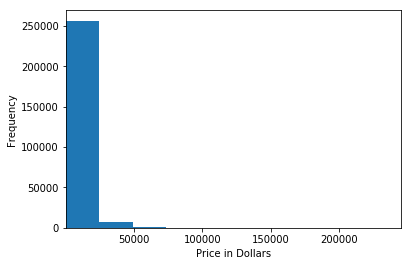

In [18]:
# Histogram of Price
print("max and min of dollar prices are: ",max(df.dollar_price),min(df.dollar_price))
hist, bin_edges = scipy.histogram(df.dollar_price)
  
# Checking the results 
print ("No. of points in each bin : ", hist) 
  
# plotting the histogram 
plt.hist(df.dollar_price,bins=10)
plt.xlim(min(bin_edges), max(bin_edges)) 
plt.xlabel('Price in Dollars')
plt.ylabel('Frequency')
plt.show()

max and min of Kilometers are:  150000 5000
No. of points in each bin :  [  3690   8949   5235  13279   7981  18879  12057      0  29088 165238]


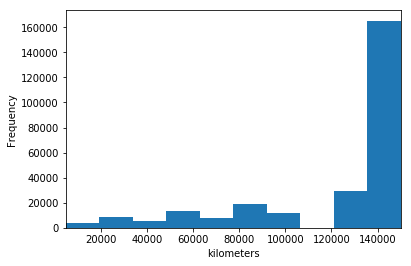

In [19]:
#Histogram of Kilometers
print("max and min of Kilometers are: ",max(df.kilometer),min(df.kilometer))
hist, bin_edges = scipy.histogram(df.kilometer)
  
# Checking the results 
print ("No. of points in each bin : ", hist) 
  
# plotting the histogram 
plt.hist(df.kilometer) 
plt.xlim(min(bin_edges), max(bin_edges)) 
plt.xlabel('kilometers')
plt.ylabel('Frequency')
plt.show()

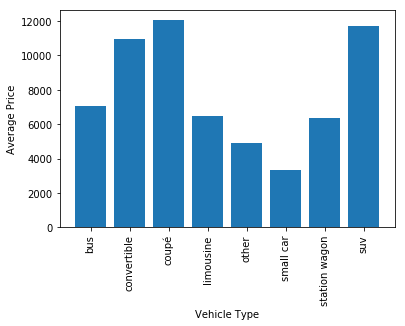

In [20]:
# Vehicle type Vs Average Price
mean_price=df.groupby(['vehicle_type'])['dollar_price'].mean()
vt=np.unique(df.vehicle_type)
plt.bar(vt,mean_price)
plt.xticks(rotation=90)
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price')
plt.show()

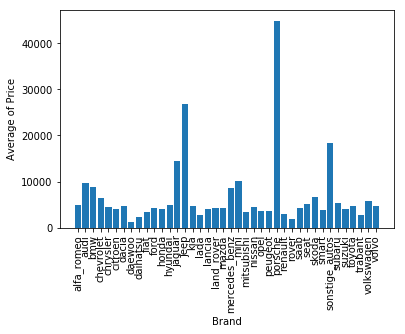

In [21]:
#Brand Vs Average Price
mean_price2=df.groupby(['brand'])['dollar_price'].mean()
br=np.unique(df.brand)
plt.bar(br,mean_price2)
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Average of Price')
plt.show()

In [21]:
#for how long was the car unsold after the add was created
times=[]
for index,row in df.ad_created.iteritems():
    date_time_ad=datetime.datetime.strptime(row,'%Y-%m-%d')
    date_time_last=datetime.datetime.strptime(df.last_seen_online[index],'%Y-%m-%d')
    date_time_diff=date_time_last.date()-date_time_ad.date()
    times.append(date_time_diff)

#a new column is added for the calculated value
df['Diff_Last_Ad']=times

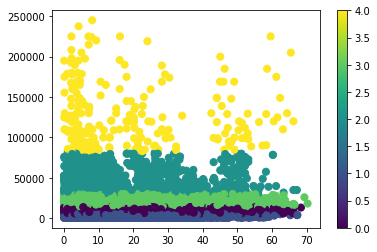

In [25]:
#Kmeans clustering
df_test=pd.DataFrame(columns=['Age','Price'])
df_test['Age']=df.Age
df_test['Price']=df.dollar_price
mat=df_test.values
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(mat)
labels=kmeans.labels_
results=pd.DataFrame([df_test.index,labels]).T

fig=plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(df_test['Age'],df_test['Price'],c=results[1],s=50)
plt.colorbar(scatter)

In [ ]:
df_test1=pd.DataFrame(columns=['Kilometer','Price'])
df_test1['Kilometer']=df.kilometer
df_test1['Price']=df.dollar_price
mat=df_test1.values
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(mat)
labels=kmeans.labels_
results=pd.DataFrame([df_test1.index,labels]).T

fig=plt.figure()
ax=fig.add_subplot(111)
scatter=ax.scatter(df_test1['Kilometer'],df_test1['Price'],c=results[1],s=50)
plt.colorbar(scatter)

In [40]:
dict_0 ={"nein":0, "ja":1}
x0=[]
for index,row in df.unrepaired_damage.iteritems():
    x0.append((dict_0[row]))
df['damage_bin']=x0

In [27]:
#adding a column with binary encoded categorical variables (Vehicle Type)
un=np.unique(df.vehicle_type)
dict_1={}
j=0
for i in un:
    b='{0:03b}'.format(j)
    dict_1[i]=b
    j+=1

x=[]
for index,row in df.vehicle_type.iteritems():
    x.append((dict_1[row]))

df['vehicle_bin']=x

In [28]:
#adding a column with binary encoded categorical variables (Brand)
un1=np.unique(df.brand)
dict_2={}
j=0
for i in un1:
    b='{0:06b}'.format(j)
    dict_2[i]=b
    j+=1

x1=[]
for index,row in df.brand.iteritems():
    x1.append(dict_2[row])

df['brand_bin']=x1

In [44]:
dict_3 ={"manuell":0, "automatik":1}
x3=[]
for index,row in df.gearbox.iteritems():
    x3.append((dict_3[row]))
df['gear_bin']=x3

In [29]:
# catergorising the models 
# Bin sizes for models
bins=[750,1200,1700,2400,3000,3800,4800,6000,7600,11000,17000,50000]
mean_price2=df.groupby(['model'])['dollar_price'].mean()
mean_price2=pd.DataFrame(mean_price2)

model_cost = {}
for index, value in mean_price2.dollar_price.iteritems():
    count = 0
    for bin_value in bins:
        if bin_value < value:
            count += 1
    model_cost[index] = count

model_tag = []
for index, value in df.model.iteritems():
    model_tag.append(model_cost[value])
df['model_tag'] = model_tag


In [53]:
#final cleaned dataset
df.to_csv('cleaned_dataset.csv') 

C:\Users\5570\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,3,5,7,9,10,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
